In [1]:
import numpy as np
import time
import gc

In [2]:
from models.bayesian_vae import BayesianVAE

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
VA = BayesianVAE(name='bvae_128_64_2',
                 n_inputs=784,
                 n_neurons_encoder = [128, 64],
                 n_latent=2,
                 n_neurons_decoder = [64, 128])

VA.learn(epochs=30, learning_rate=0.001)
VA.benchmark()

   [29.2] Epoch: 01 | NELBO: 12339804.268065 | ELL: -224.251550 | KL: 5969.018970 | Val. ELL: -195.305256
   [30.1] Epoch: 02 | NELBO: 10568528.897436 | ELL: -192.152510 | KL: 140.833515 | Val. ELL: -187.199336
   [30.9] Epoch: 03 | NELBO: 10072095.310023 | ELL: -183.127952 | KL: 57.993799 | Val. ELL: -177.830628
   [31.7] Epoch: 04 | NELBO: 9587701.986014 | ELL: -174.321133 | KL: 39.666130 | Val. ELL: -169.819910
   [31.9] Epoch: 05 | NELBO: 9213693.871795 | ELL: -167.520991 | KL: 39.345368 | Val. ELL: -163.196809
   [33.0] Epoch: 06 | NELBO: 8927234.009324 | ELL: -162.312623 | KL: 39.735486 | Val. ELL: -159.333540
   [32.1] Epoch: 07 | NELBO: 8708796.292541 | ELL: -158.340974 | KL: 42.749556 | Val. ELL: -155.467266
   [31.6] Epoch: 08 | NELBO: 8541602.663170 | ELL: -155.301095 | KL: 42.420925 | Val. ELL: -152.851586
   [31.8] Epoch: 09 | NELBO: 8401949.498834 | ELL: -152.761976 | KL: 40.788131 | Val. ELL: -150.375770
   [32.3] Epoch: 10 | NELBO: 8299048.473193 | ELL: -150.891023 | KL

In [5]:
VA.benchmark()

-138.85458002334985

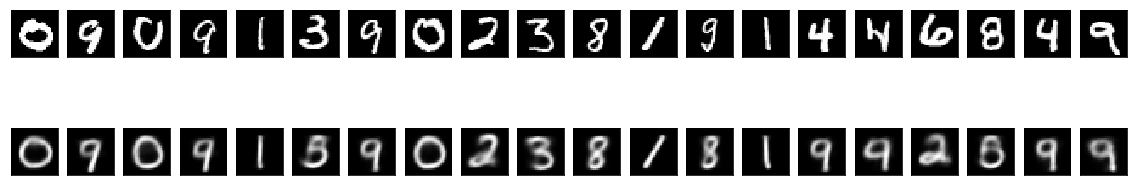

In [6]:
VA.plot_enc_dec(20, save=True)

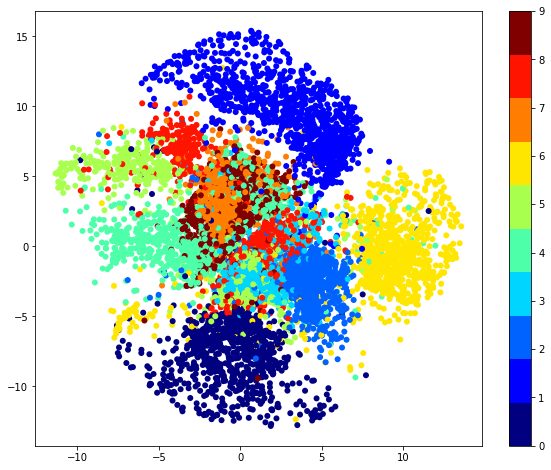

In [8]:
VA.plot_latent_repr(save=True)

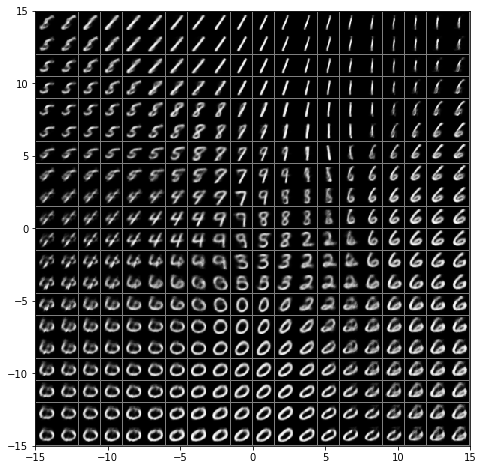

In [10]:
VA.plot_latent_recon(l_min=-15, l_max=15, save=True)

In [11]:
VA.serialize('DUMPS/bvae_simple/model.ckpt')

Model saved in file: DUMPS/bvae_simple/model.ckpt


In [3]:
VA = BayesianVAE(name='bvae_128_64_2',
                 n_inputs=784,
                 n_neurons_encoder = [128, 64],
                 n_latent=2,
                 n_neurons_decoder = [64, 128])
VA.restore('DUMPS/bvae_simple/model.ckpt')

INFO:tensorflow:Restoring parameters from DUMPS/bvae_simple/model.ckpt


In [4]:
VA = BayesianVAE(name='bvae_128_64_2_advanced',
                 n_inputs=784,
                 n_neurons_encoder = [128, 64],
                 n_latent=2,
                 n_neurons_decoder = [64, 128])

VA.learn(epochs=30, learning_rate=0.001)

   [28.3] Epoch: 01 | NELBO: 12637016.386946 | ELL: -229.655426 | KL: 5967.985530 | Val. ELL: -202.261890
   [30.0] Epoch: 02 | NELBO: 10795627.438228 | ELL: -196.281905 | KL: 122.679710 | Val. ELL: -193.354281
   [32.5] Epoch: 03 | NELBO: 10450858.209790 | ELL: -190.014015 | KL: 87.377509 | Val. ELL: -186.298996
   [32.7] Epoch: 04 | NELBO: 10058947.937063 | ELL: -182.887946 | KL: 110.900086 | Val. ELL: -179.121739
   [32.1] Epoch: 05 | NELBO: 9738139.585082 | ELL: -177.054602 | KL: 136.486035 | Val. ELL: -174.396446
   [31.3] Epoch: 06 | NELBO: 9514032.100233 | ELL: -172.979496 | KL: 159.820998 | Val. ELL: -170.292535
   [31.7] Epoch: 07 | NELBO: 9330987.289044 | ELL: -169.651150 | KL: 174.095457 | Val. ELL: -167.176650
   [35.0] Epoch: 08 | NELBO: 9155157.306527 | ELL: -166.453892 | KL: 193.251240 | Val. ELL: -163.924613
   [33.6] Epoch: 09 | NELBO: 8997715.699301 | ELL: -163.591050 | KL: 207.974184 | Val. ELL: -161.523417
   [31.3] Epoch: 10 | NELBO: 8891260.270396 | ELL: -161.6553

In [5]:
VA.benchmark()

-139.74644108307666

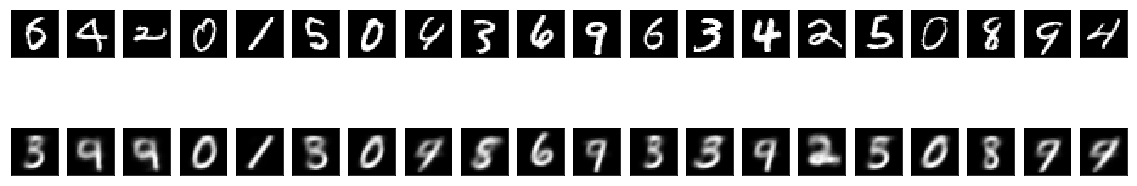

In [8]:
VA.plot_enc_dec(20, save=True)

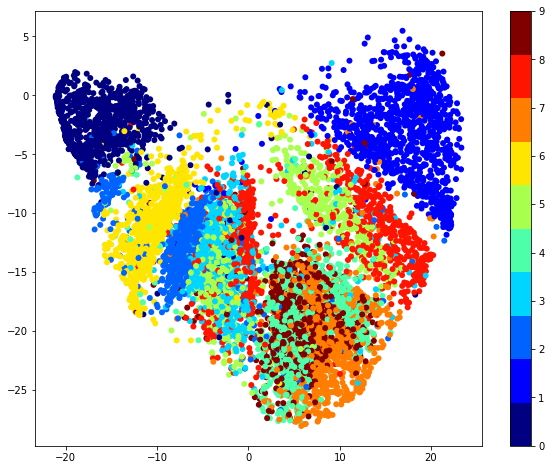

In [6]:
VA.plot_latent_repr(save=True)

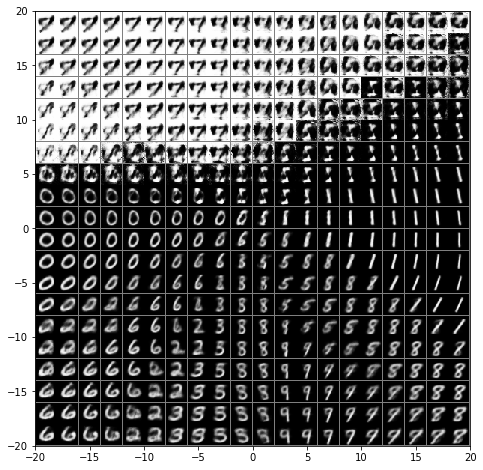

In [6]:
VA.plot_latent_recon(l_min=-20, l_max=20, save=True)

In [10]:
VA.serialize('DUMPS/bvae_advanced/model.ckpt')

Model saved in file: DUMPS/bvae_advanced/model.ckpt


In [3]:
VA = BayesianVAE(name='bvae_128_64_2_advanced',
                 n_inputs=784,
                 n_neurons_encoder = [128, 64],
                 n_latent=2,
                 n_neurons_decoder = [64, 128])

In [4]:
VA.restore('DUMPS/bvae_advanced/model.ckpt')

INFO:tensorflow:Restoring parameters from DUMPS/bvae_advanced/model.ckpt
